In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np

from numpy.random import seed
from tensorflow.random import set_seed
seed(42)
set_seed(42)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images variables in [0, 1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# shape (60000, 28, 28) -> (60000, 28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# shape (60000,) -> (60000, 1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# output to one hot encoding
enc = OneHotEncoder(sparse=False)
y_train = enc.fit_transform(y_train)
y_test = enc.transform(y_test)

In [3]:
model = Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(30, activation='relu'),
    Dense(20, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='softmax') 
])
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy')
hist = model.fit(x_train, y_train, epochs=30, verbose=1, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                160       
Total params: 24,645
Trainable params: 24,645
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1500/1500 [==============================] - 17s 11ms/step - loss: 0.4604 - val_loss: 0.2341
Epoch 2/30
150

<AxesSubplot:>

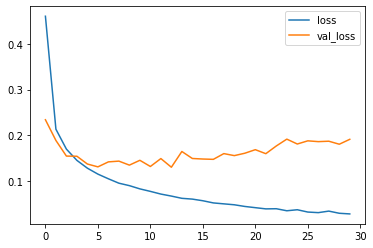

In [4]:
pd.DataFrame(hist.history).plot()

In [5]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.1920


0.1919853687286377